# yolov5
version 2 

author: nmc-costa

info: testing version 2


# Setup
Go to _tutorial.ipnb for full setup (like cloning the yolov5 repo, etc...)

In [1]:
import os
import sys
import platform
import torch
from IPython.display import Image, clear_output  # to display images


clear_output()

#Define root dir dependent on OS
rdir='D:/external_datasets/' 
if str(platform.platform()).find('linux')>-1: rdir='/mnt/d/external_datasets/' 
print('OS: {}'.format(platform.platform()))
print('root dir: {}'.format(rdir))
print("Python: " + sys.version)

#cuda 
#os.environ["CUDA_VISIBLE_DEVICES"]="" #force CPU
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

OS: Windows-10-10.0.20251-SP0
root dir: D:/external_datasets/
Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Setup complete. Using torch 1.7.0 _CudaDeviceProperties(name='GeForce GTX 1070', major=6, minor=1, total_memory=8192MB, multi_processor_count=16)


## init vars

In [2]:
# DIRs [needed if you use %cd command multiple times ]
#script dir 
scriptdir=sys.path[0] #os.getcwd()
#yolov5 Dir
yolov5_dir=os.path.join(scriptdir, 'yolov5')
print(yolov5_dir)
#json2yolo Dir
json2yolo_dir=os.path.join(scriptdir, 'json2yolo')
print(json2yolo_dir)

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5
C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\json2yolo


## 0. input data
#### Prepare the dataset for yolo format (CHECK OUT https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data ; https://medium.com/towards-artificial-intelligence/yolo-v5-is-here-custom-object-detection-tutorial-with-yolo-v5-12666ee1774e)

##### 1. Create labels and organize dataset in YOLO format (USE $JSON2YOLO$ folder)

Dataset Directory structure:
- dataset:
    - annotations:
        - samefoldername.json (WARNING: use 'train', 'val', 'test')
    - images:
        - samefoldername
    - labels:
        - samefoldername

Example :

dataset/images/train/000000109622.jpg  # image

dataset/labels/train/000000109622.txt  # label


In [27]:
source="mola"
datasets_root_dir='D:/external_datasets/'
json_dir='D:/external_datasets/MOLA/annotations/train_mola_mix_aggressive/'
outdir="D:/external_datasets/MOLA/yoloformat/mola128/"
img_number=128

In [ ]:
%cd $json2yolo_dir
!python json2yolo.py --source $source --datasets_root_dir $datasets_root_dir --json_dir $json_dir --outdir $outdir --img_number $img_number

##### 2. create dataset .yaml file (like coco_external)

Yolov5 algorithm parses yaml information: path to dataset(train, validation and test) in YOLO (darknet) format (see below); number of classes and classes names

In [3]:
#YAML Paths # use different yamls
datasetyaml=os.path.join(scriptdir, 'coco128_external.yaml')

##### 3. Select a Model(yolov5s, yolov5x, ...) and update the number of classes to match the dataset

Go to $./models$ folder and copy model .yaml file tho this directory and change the $nc: $ parameter

In [4]:
#YAML Paths # use different models
modelyaml=os.path.join(scriptdir, 'yolov5/models/yolov5s.yaml')

## 1. Train
Run the training command below to train for X epochs. 

EXAMPLE: You can train YOLOv5s from scratch by passing `--cfg yolov5s.yaml --weights ''`, or train from a pretrained checkpoint by passing a matching weights file: `--cfg yolov5s.yaml --weights yolov5s.pt`.

Train function retrains the model with the new 'train' data and tests the model against the 'val' data

All training results are saved to runs/exp0 for the first experiment, then runs/exp1, runs/exp2 etc. for subsequent experiments.

In [7]:
# Clear any logs from previous runs
#BUG WINDOWS runs/exp0 don't iterates to exp1,exp2,...
logdir=os.path.join(yolov5_dir, 'runs/detect')
!rm -rfv $logdir

removed directory 'C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5\runs/detect/exp'
removed directory 'C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5\runs/detect/exp2'
removed directory 'C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5\runs/detect'


In [8]:
# Start tensorboard (optional)
#BUG WINDOWS are not able to log information
%cd $yolov5_dir

%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir runs

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5


Reusing TensorBoard on port 6006 (pid 5060), started 4 days, 3:20:36 ago. (Use '!kill 5060' to kill it.)

In [9]:
# Train Models from scractch 
#(#WARNING: if using --cache parameter you need to be careful: in yolov5.utils.datasets gives keyerror; #SOLUTION delete cache in dataset folder or don't use --cache)
%cd $yolov5_dir
#!pwd
# !ls
!python train.py --img 640 --batch 8 --epochs 3 --data $datasetyaml --cfg $modelyaml --weights ''

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5

Analyzing anchors... anchors/target = 4.26, Best Possible Recall (BPR) = 0.9946
                 all         128           0           0           0           0           0
                 all         128           0           0           0           0           0
                 all         128           0           0           0           0           0
Optimizer stripped from runs\train\exp\weights\last.pt, 15.2MB
Optimizer stripped from runs\train\exp\weights\best.pt, 15.2MB


Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='C:\\Users\\nmc_costa\\google_drive\\projects\\bosch_P19\\research\\python_ws\\violent_action\\yolo\\yolov5/models/yolov5s.yaml', data='C:\\Users\\nmc_costa\\google_drive\\projects\\bosch_P19\\research\\python_ws\\violent_action\\yolo\\coco128_external.yaml', device='', epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs\\train\\exp', single_cls=False, sync_bn=False, total_batch_size=8, weights="''", workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmu

## 2. Output data (Visualize)

View runs/exp0/train*.jpg images to see training images, labels and augmentation effects. A Mosaic Dataloader is used for training (shown below), a new concept developed by Ultralytics and first featured in YOLOv4. If your labels are not correct in these images then you have incorrectly labelled your data, and should revisit 2. Create Labels.

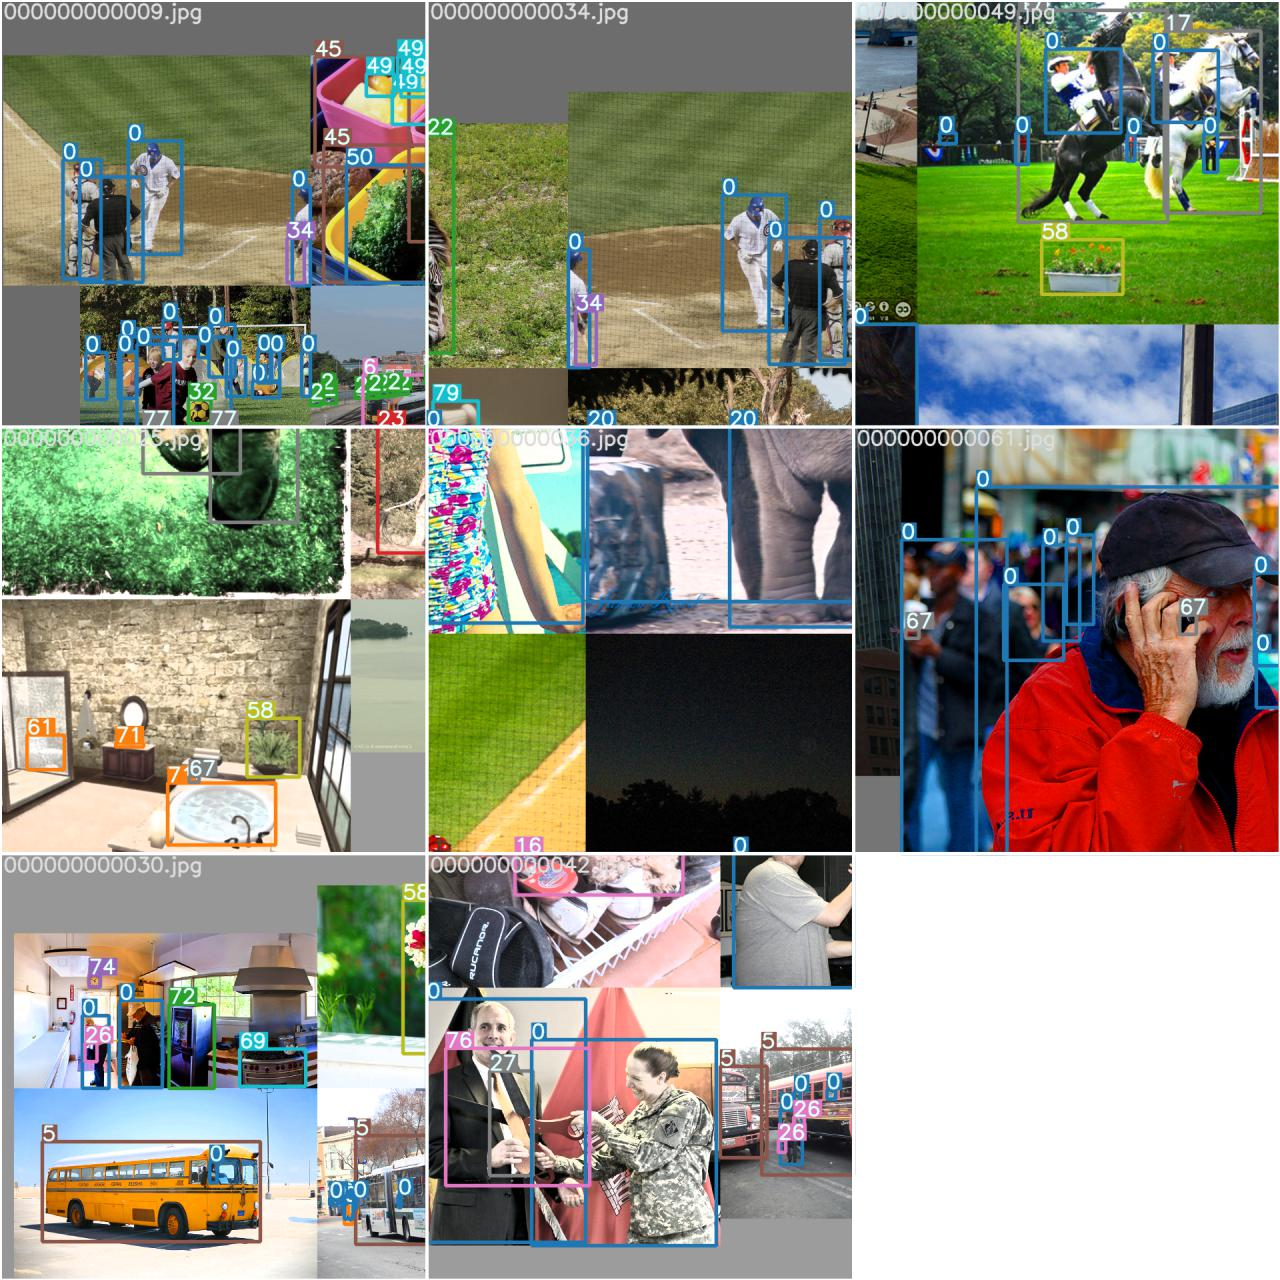

In [11]:
Image(filename=os.path.join(yolov5_dir,'runs/train/exp/train_batch0.jpg'), width=900)

## 3. Inference (detect)

In [14]:
%cd $yolov5_dir
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.4 --augment --source D:/external_datasets/mola_samples/VIDEOS
#!python detect.py --source D:/external_datasets/mola_samples/VIDEOS --output  D:/external_datasets/mola_samples/inference/yolov5/yolov5s_coco128test_augment --weights runs/exp0/weights/best.pt --conf 0.4 --augment

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5
Namespace(agnostic_nms=False, augment=True, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='D:/external_datasets/mola_samples/VIDEOS', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])

Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Model Summary: 232 layers, 7459581 parameters, 0 gradients



Fusing layers... 
video 1/9 (1/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.039s)
video 1/9 (2/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.040s)
video 1/9 (3/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.035s)
video 1/9 (4/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.034s)
video 1/9 (5/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.033s)
video 1/9 (6/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.036s)
video 1/9 (7/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.035s)
video 1/9 (8/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.034s)
video 1/9 (9/53) D:\external_datasets\mola_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.035s)
video 1/9 (10/53) D:\extern

In [16]:
%cd $yolov5_dir
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source data/images/

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Fusing layers... 
image 1/2 C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5\data\images\bus.jpg: 640x480 Done. (0.014s)
image 2/2 C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5\data\images\zidane.jpg: 384x640 Done. (0.011s)
Results saved to runs\detect\exp5
Done. (1.005s)


Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Model Summary: 232 layers, 7459581 parameters, 0 gradients


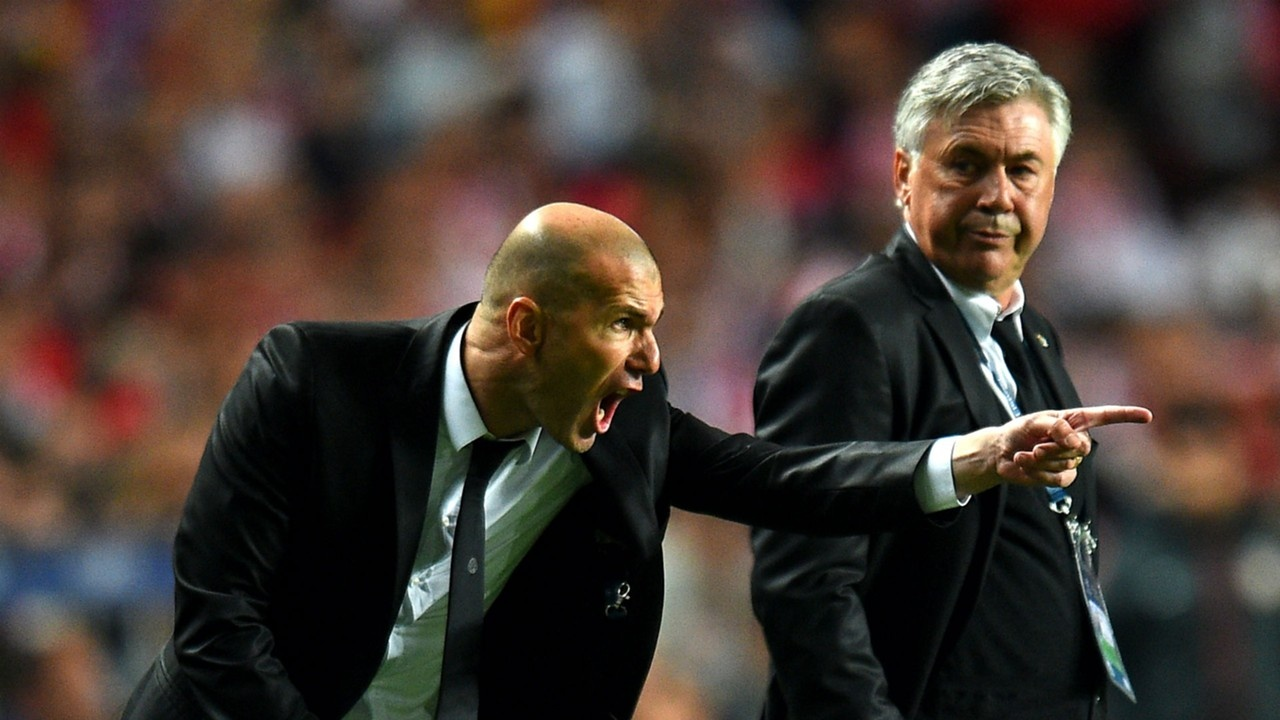

In [17]:
Image(filename='runs/detect/exp5/zidane.jpg', width=600)

## 4. (Re-) Test/validate

(Re-) Test a model on dataset to determine trained accuracy (WARNING : Train already does this). Models are auto-downloaded from Google Drive. To show results by class use the --verbose flag.

In [ ]:
# SHELL Ipython: Run YOLOv5x on COCO validation images
%cd $yolov5_dir
#!pwd
#!ls
!python test.py --weights runs/exp0/weights/best.pt --data $yaml --task 'val' --img 672 --verbose